# 1. Introduction to Calculus for Data Science

## What is Calculus?
Calculus is a branch of mathematics that studies how things change. It is divided into two main areas:

- **Differential Calculus**: Deals with rates of change and slopes of curves.
- **Integral Calculus**: Concerns accumulation of quantities and areas under curves.

## Why Data Scientists Need Calculus
In data science, calculus plays a key role in optimizing machine learning algorithms, such as finding the minimum of a cost function in regression, neural networks, and optimization problems. Calculus helps data scientists:

- Understand how models change in response to input data.
- Optimize algorithms (minimize loss functions using gradient descent).
- Understand key concepts such as marginal changes, partial derivatives, and integrals in probabilistic models.

## Key Concepts in Calculus for Data Science
- **Limits**: The concept of approaching a value.
- **Derivatives**: Measures of how a function changes as its input changes.
- **Integrals**: The accumulation of quantities over an interval.
- **Optimization**: Minimizing or maximizing a function.
- **Gradient Descent**: A method for finding the minimum of a function.

# 2. Limits and Continuity

## Definition of Limits
The limit of a function describes the behavior of the function as x approaches a particular point. For example, the limit of 
**𝑓(𝑥)** as **𝑥** approaches 2 can be written as:<pre>
lim 𝑓(𝑥)
𝑥→2

![ALT TEXT](./img/limit_at_a_point.gif)

## Understanding Limits through Examples
If **𝑓(𝑥)=𝑥²**, then the limit as **𝑥** approaches **2** is:<pre>
lim 𝑥² = 4
𝑥→2</pre>
This means that as **𝑥** gets closer to 2, **𝑓(𝑥)** approaches 4.

In [2]:
import sympy as sp

# Define the variable and function
x = sp.Symbol('x')
f = x**2

# Calculate the limit as x approaches 2
limit_f = sp.limit(f, x, 2)
limit_f

4

In [5]:
sp.limit(f,x,)

oo

## Continuity in Functions
A function is continuous at a point if the limit exists at that point and equals the function’s value. In data science, continuity is important when working with optimization techniques and smooth loss functions.

In [10]:
# Define the variable
x = sp.symbols('x')

# Define the function
f = sp.Piecewise((x**2, x < 2), (2*x + 1, x > 2))

# Function to check continuity at a given point
def check_continuity(f, point):
    # Evaluate the left-hand and right-hand limits of the function at the given point
    left_limit = sp.limit(f, x, point, dir='-')
    right_limit = sp.limit(f, x, point, dir='+')
    
    # Evaluate the value of the function at the point
    value_at_point = f.subs(x, point)
    
    # Check if the left and right limits are equal and match the value at the point
    if left_limit == right_limit == value_at_point:
        print(f"The function is continuous at x = {point}.")
    else:
        print(f"The function is not continuous at x = {point}.")
        print(f"Left limit: {left_limit}, Right limit: {right_limit}, Value at {point}: {value_at_point}")

# Check continuity at x = 2
check_continuity(f, 2)
# Check continuity at x = 5
check_continuity(f, 5)

The function is not continuous at x = 2.
Left limit: 4, Right limit: 5, Value at 2: nan
The function is continuous at x = 5.


## Applications in Data Science (Optimization)
Limits are crucial in optimization. When tuning a machine learning model, you need to ensure that small changes in the model's parameters lead to small changes in the loss function, ensuring stability.


# 3. Differentiation

##  Concept and Definition
The derivative of a function measures how it changes as its input changes. Mathematically, the derivative of a function **𝑓(𝑥)** at a point **𝑥** is:<pre>
𝑓′(𝑥) = lim 𝑓(𝑥+Δ𝑥)−𝑓(𝑥) / Δ𝑥
_       Δ𝑥→0

![ALT TEXT](./img/Slope_of_the_tangent_line.gif)

## Common Derivatives
<pre>
- 𝑑/𝑑x 𝑥**𝑛 = 𝑛𝑥**(𝑛−1)
- 𝑑/𝑑x sin(𝑥) = cos(𝑥)
- 𝑑/𝑑x ln⁡(𝑥) = 1/𝑥​

## Chain Rule, Product Rule, and Quotient Rule

### Chain Rule: 
<pre>
𝑑/𝑑x 𝑓(𝑔(𝑥)) = 𝑓′(𝑔(𝑥))⋅𝑔′(𝑥)

### Product Rule: 
<pre>
𝑑/𝑑x [𝑢(𝑥)𝑣(𝑥)] = 𝑢′(𝑥)𝑣(𝑥)+ 𝑢(𝑥)𝑣′(𝑥)

### Quotient Rule: 
<pre>
𝑑/𝑑x [𝑢(𝑥)/𝑣(𝑥)] = 𝑢′(𝑥)𝑣(𝑥)−𝑢(𝑥)𝑣′(𝑥) / 𝑣(𝑥)²

## Higher-Order Derivatives
Higher-order derivatives, such as the second derivative 
**𝑓′′(𝑥)**, measure the rate of change of the rate of change and are essential in optimization for checking convexity and concavity.

## Applications in Data Science: Gradients, Cost Functions, and Optimization
In machine learning, derivatives help minimize the cost function. The derivative, or gradient, provides the direction and rate of change of the function, which is used in gradient descent to optimize models.

#### Chain Rule Example
If **𝑓(𝑥) = sin(𝑥²)**, the derivative using the chain rule is:<pre>
𝑓′(𝑥)=cos(𝑥2)⋅2𝑥

In [11]:
# Define the function
g = x**2
f = sp.sin(g)

# Calculate the derivative using the chain rule
f_prime = sp.diff(f, x)
f_prime

2*x*cos(x**2)

This code computes the derivative of **sin(𝑥²)** using SymPy, applying the chain rule automatically.

# 4. Partial Derivatives

## Concept
In multivariable calculus, a partial derivative measures how a function changes as one variable changes, keeping other variables constant. If **𝑓(𝑥,𝑦)** is a function of two variables:<pre>
∂𝑓 / ∂𝑥 , ∂𝑓 / ∂𝑦​

## Gradient Vectors and Directional Derivatives
The **gradient** of a function is a vector of partial derivatives, pointing in the direction of the steepest ascent. It is crucial in optimization for determining how to adjust parameters in machine learning models:<pre>
∇𝑓(𝑥,𝑦) = (∂𝑓 / ∂𝑥 , ∂𝑓 / ∂𝑦)

![ALT TEXT](./img/partial_derivative_as_slope.png)

## Applications in Machine Learning: Gradient Descent and Backpropagation
Partial derivatives are fundamental in algorithms like gradient descent and backpropagation, where the goal is to adjust parameters in neural networks to minimize error.

#### Example: Gradient Descent
Consider a function **𝑓(𝑥,𝑦)=𝑥²+𝑦²**. The partial derivatives are:<pre>
∂𝑓 / ∂𝑥 = 2𝑥,∂𝑓 / ∂𝑦 = 2𝑦

In [16]:
import numpy as np

# Define the gradient of the function
def gradient(x, y):
    return np.array([2*x, 2*y])

# Implement gradient descent
def gradient_descent(learning_rate=0.1, epochs=50):
    x, y = 10.0, 7.4  # Starting point
    for _ in range(epochs):
        grad = gradient(x, y)
        x, y = x - learning_rate * grad[0], y - learning_rate * grad[1]
        print(f"x: {x}, y: {y}")

gradient_descent()

x: 8.0, y: 5.92
x: 6.4, y: 4.736
x: 5.12, y: 3.7887999999999997
x: 4.096, y: 3.03104
x: 3.2768, y: 2.424832
x: 2.62144, y: 1.9398655999999999
x: 2.0971520000000003, y: 1.5518924799999998
x: 1.6777216000000004, y: 1.2415139839999998
x: 1.3421772800000003, y: 0.9932111871999998
x: 1.0737418240000003, y: 0.7945689497599998
x: 0.8589934592000003, y: 0.6356551598079998
x: 0.6871947673600002, y: 0.5085241278463999
x: 0.5497558138880001, y: 0.40681930227711993
x: 0.43980465111040007, y: 0.32545544182169595
x: 0.35184372088832006, y: 0.26036435345735676
x: 0.281474976710656, y: 0.2082914827658854
x: 0.22517998136852482, y: 0.16663318621270834
x: 0.18014398509481985, y: 0.13330654897016667
x: 0.14411518807585588, y: 0.10664523917613333
x: 0.11529215046068471, y: 0.08531619134090666
x: 0.09223372036854777, y: 0.06825295307272533
x: 0.07378697629483821, y: 0.054602362458180266
x: 0.05902958103587057, y: 0.043681889966544214
x: 0.04722366482869646, y: 0.03494551197323537
x: 0.037778931862957166, y

This code simulates gradient descent for the function 
**𝑓(𝑥,𝑦) = 𝑥2 + 𝑦2**, showing how the algorithm moves towards the minimum.

# 5. Differentiation for Vector-Valued Functions

## Jacobian and Hessian Matrices
- **Jacobian Matrix**: Represents first-order partial derivatives of vector-valued functions.
- **Hessian Matrix**: Represents second-order partial derivatives. The Hessian is used to study the curvature of functions and determine if a critical point is a maximum, minimum, or saddle point.

## Applications in Machine Learning: Neural Networks and Multivariable Optimization
Jacobian and Hessian matrices are used in neural networks for computing gradients in high-dimensional spaces, aiding in more accurate optimization.

#### Jacobian Example
Consider the function **𝑓(𝑥,𝑦)=(𝑥²+𝑦,𝑥+𝑦²)**. The Jacobian matrix is:<pre>
𝐽 = 
_ ( 2𝑥 1
_   1  2𝑦)

In [25]:
# Define variables and function
x, y = sp.symbols('x y')
f = x**2 + y

# Compute the Jacobian matrix
jacobian = sp.Matrix([f]).jacobian([x, y])
jacobian

Matrix([[2*x, 1]])

# 6. Taylor Series

## Taylor Expansions
The Taylor series approximates functions around a specific point by using derivatives. For a function **𝑓(𝑥)** around **𝑥 = 𝑎**, the Taylor expansion is:<pre>
𝑓(𝑥) ≈ 𝑓(𝑎) + 𝑓′(𝑎)(𝑥−𝑎) + 𝑓′′(𝑎)/2! * (𝑥−𝑎)² + ...

![ALT TEXT](./img/taylor.png)

## Using Taylor Series for Function Approximation
In machine learning, Taylor series can approximate non-linear functions, which is helpful in optimizations and model simplifications.

#### Example: Taylor Expansion of sin(𝑥) around 𝑥=0
The Taylor series for **sin(𝑥)** is:<pre>
sin(𝑥) ≈ 𝑥 − 𝑥³/3! + 𝑥⁵/5! −...

In [29]:
# Taylor expansion of sin(x)
taylor_exp = sp.series(sp.sin(x), x, 0, 6)
taylor_exp

x - x**3/6 + x**5/120 + O(x**6)

# 7. Integration

## Concept
Integration is the reverse process of differentiation. It calculates the accumulation of quantities, such as areas under curves.<pre>
∫ 𝑓(𝑥) 𝑑𝑥

## Definite vs Indefinite Integrals
- **Indefinite Integral**: Represents the family of all antiderivatives.
- **Definite Integral**: Computes the area under the curve from one point to another, with limits.<pre>
∫a→b 𝑓(𝑥) 𝑑𝑥

## Techniques of Integration
- Substitution
- Integration by parts
- Partial fractions

## Applications in Data Science: Probability, Area under Curves, and CDFs
Integrals are used to compute areas under probability density functions, which is essential in statistics and machine learning for probabilistic models.

#### Example: Indefinite Integral
Find the indefinite integral of **𝑓(𝑥)=𝑥²**:<pre>
∫ 𝑥² 𝑑𝑥 = 𝑥³ / 3 +𝐶

In [30]:
# Define the function
f = x**2

# Compute the indefinite integral
integral_f = sp.integrate(f, x)
integral_f

x**3/3

# 8. Multivariable Calculus

## Double and Triple Integrals
In multivariable calculus, double and triple integrals extend the concept of integration to two and three dimensions, respectively.<pre>
∫𝑎→𝑏∫𝑐→𝑑 𝑓(𝑥,𝑦) 𝑑𝑥 d𝑦

## Applications in Data Science: Calculating Areas, Volumes, and Probabilities in Multiple Dimensions
Multivariable integration is useful in complex probability distributions and calculating expected values in high-dimensional data.

#### Example: Double Integral
Find the area under the surface **𝑓(𝑥,𝑦)=𝑥+𝑦** over the region **[0,1]×[0,1]**:<pre>
∫0→1∫0→1 (𝑥+𝑦) 𝑑𝑥 𝑑𝑦

In [32]:
# Define the function
f = x + y

# Compute the double integral
double_integral = sp.integrate(sp.integrate(f, (x, 0, 1)), (y, 0, 1))
double_integral

1

# 9. Optimization in Data Science

## Univariate and Multivariate Optimization
In machine learning, optimization refers to the process of finding the minimum or maximum of a function, typically a cost function in models like linear regression or neural networks.

## Critical Points and Saddle Points
Critical points occur where the first derivative is zero. A critical point can be a local minimum, local maximum, or saddle point, determined by the second derivative (concavity or convexity).

## Applications in Data Science: Logistic Regression, SVMs, and Optimization Algorithms
Optimization techniques like gradient descent are used to minimize loss functions in regression models, support vector machines (SVMs), and neural networks.

# 10. Differential Equations

## Basic Definitions and Concepts
Differential equations involve functions and their derivatives. They describe how a quantity changes over time or space.

## Ordinary Differential Equations (ODEs) and Their Applications
ODEs describe systems with one independent variable (e.g., time). They are used in time-series forecasting and dynamic models.

## Applications in Data Science: Time Series Forecasting, Dynamic Systems
In data science, ODEs can model systems that evolve over time, such as predicting stock prices or modeling system dynamics in reinforcement learning.

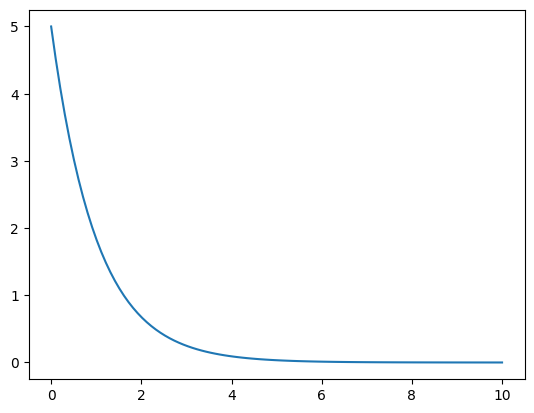

In [22]:
from scipy.integrate import odeint

# Define a simple ODE dy/dt = -y
def model(y, t):
    dydt = -y
    return dydt

# Initial condition and time points
y0 = 5
t = np.linspace(0, 10, 100)

# Solve ODE
y = odeint(model, y0, t)

# Plot the solution
import matplotlib.pyplot as plt
plt.plot(t, y)
plt.show()


# 11. Calculus in Machine Learning

## Loss Functions and Gradient Descent
The goal of machine learning algorithms is to minimize a loss function. Using derivatives (gradients), we iteratively update model parameters to minimize the error.<pre>
𝜃 = 𝜃−𝛼∇𝐽(𝜃)
</pre>
Where 𝛼 is the learning rate, 𝜃 are the model parameters, and ∇𝐽(𝜃) is the gradient of the cost function.

## Regularization and the Role of Derivatives
Regularization terms, such as **L1** and **L2**, are used to prevent overfitting. The derivatives of these terms are included in the gradient calculations.

## Backpropagation in Neural Networks
Backpropagation uses chain rules to propagate errors backward through the layers of a neural network, updating weights in the process.

## Optimization Techniques and Convergence
Beyond gradient descent, there are more advanced optimization techniques such as stochastic gradient descent (SGD), momentum, and Adam optimizer, which use derivatives to speed up convergence.

In [33]:
import numpy as np

# Simulate a neural network backpropagation step
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input data and weights
inputs = np.array([1.0, 0.5])
weights = np.array([0.4, 0.6])

# Forward pass
output = sigmoid(np.dot(inputs, weights))

# Print weights before backpropagation
print("Before Backprobagation: ",weights)

# Backpropagation (simplified)
error = output - 1  # Assume the true label is 1
weights -= 0.1 * error * sigmoid_derivative(output) * inputs

# Print weights after backpropagation
print("After Backprobagation: ",weights)

Before Backprobagation:  [0.4 0.6]
After Backprobagation:  [0.40743418 0.60371709]
